In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

uploaded = files.upload()  # Faça o upload do seu arquivo Excel

# Carregar os dados
df = pd.read_excel(next(iter(uploaded.keys())))

# Visualizar as primeiras linhas para verificar se os dados foram carregados corretamente
df.head()

Saving MédiaCPU.xlsx to MédiaCPU (7).xlsx


,Tempo,Uso CPU V1,Uso CPU V2,Uso CPU V3,Uso CPU V4,Uso CPU V5,Uso CPU V6,Uso CPU V7,Uso CPU V8,Uso CPU V9,Uso CPU V10,Média
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,0.5,5.4,5.4,5.2,5.3,5.7,5.2,5.1,5.6,5.9,5.5,5.43
2,1.0,5.3,5.9,5.2,5.2,5.6,5.4,5.4,5.8,6.0,5.9,5.56
3,1.5,5.7,5.4,5.4,5.0,5.9,5.6,6.0,6.0,5.0,5.9,5.59
4,2.0,5.4,5.3,5.2,5.3,5.2,5.7,5.1,5.6,5.8,5.7,5.43


Saving MédiaCPU.xlsx to MédiaCPU (60).xlsx


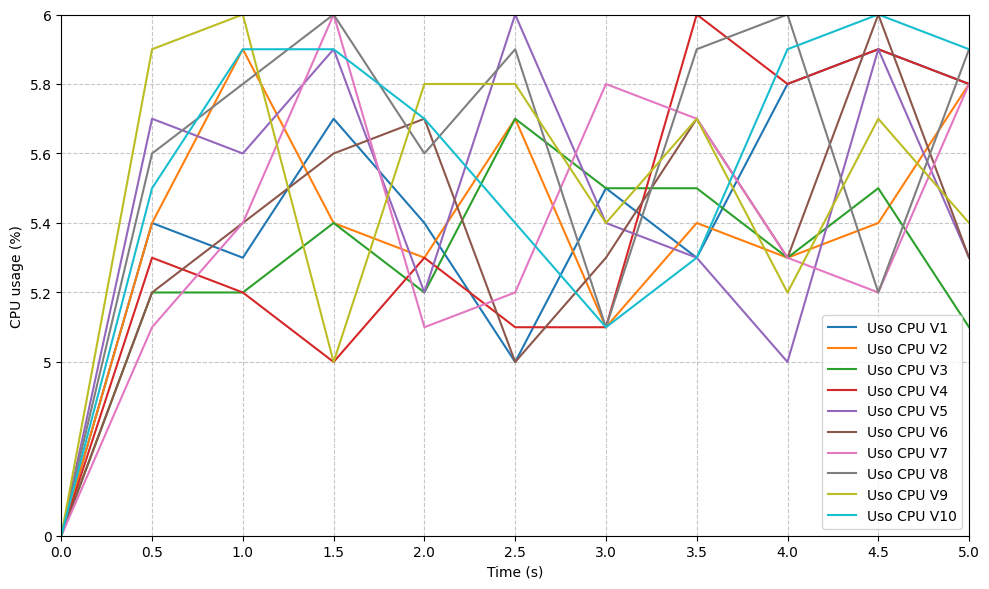

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Função para transformar os valores do eixo Y (5 → 3.5, 6 → 6)
def transform_y(y):
    #return np.where(y <= 5, y * 0.7, 3.5 + (y - 5) * 3)
    return np.where(y <= 5, y * 0.4, 2 + (y - 5) * 4)

# Valores desejados no eixo Y (0, 5, 5.2, 5.4, 5.6, 5.8, 6)
y_ticks = [0, 5, 5.2, 5.4, 5.6, 5.8, 6]

# Labels correspondentes (opcional: formatar para 1 decimal)
y_labels = ['0', '5', '5.2', '5.4', '5.6', '5.8', '6']

uploaded = files.upload()
df = pd.read_excel(next(iter(uploaded.keys())))

# Processar dados
for col in df.columns:
    if col != 'Tempo':
        df[col] = df[col].astype(str).str.replace('%', '').str.replace(',', '.').astype(float)

# Configurar figura
plt.figure(figsize=(10, 6))

# Plotar dados transformados
for i in range(1, 11):
    col_name = f'Uso CPU V{i}'
    if col_name in df.columns:
        plt.plot(df['Tempo'], transform_y(df[col_name]), label=col_name)

# Ajustar eixos
plt.ylim(transform_y(0), transform_y(6))  # Limites transformados
plt.yticks(
    ticks=[transform_y(val) for val in y_ticks],  # Aplicar transformação aos ticks
    labels=y_labels
)
plt.xlim(0, 5)
plt.xticks(np.arange(0.0, 5.5, 0.5))

# Labels e grid
plt.xlabel('Time (s)')
plt.ylabel('CPU usage (%)')
plt.grid(True, linestyle='--', alpha=0.7)

plt.legend()
plt.tight_layout()
#plt.show()
plt.savefig("Cont11.pdf", format="pdf", bbox_inches="tight")

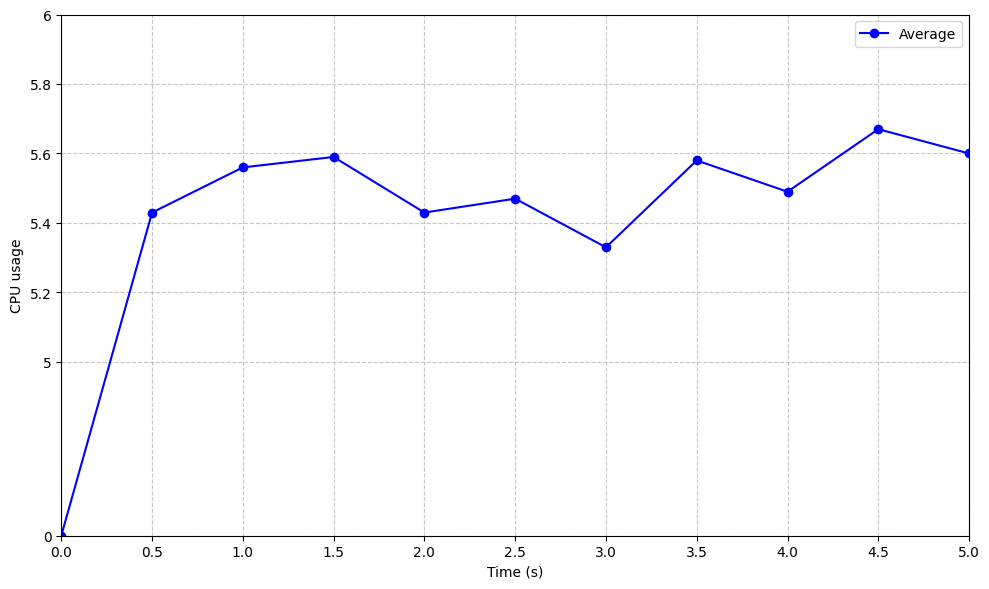

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
tempos = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
medias = [0.0, 5.43, 5.56, 5.59, 5.43, 5.47, 5.33, 5.58, 5.49, 5.67, 5.60]

# Função de transformação (0→0, 5→2, 6→6)
def transform_y(y):
    return np.where(y <= 5, y * 0.4, 2 + (y - 5) * 4)

# Valores desejados no eixo Y (incluindo intermediários)
y_values = [0, 5, 5.2, 5.4, 5.6, 5.8, 6]
y_labels = ['0', '5', '5.2', '5.4', '5.6', '5.8', '6']

# Aplicar transformação
y_transformed = [transform_y(val) for val in medias]
yticks_transformed = [transform_y(val) for val in y_values]

# Criar gráfico
plt.figure(figsize=(10, 6))
plt.plot(tempos, y_transformed, marker='o', linestyle='-', color='blue', label='Average')

# Configurar eixos
plt.ylim(transform_y(0), transform_y(6))
plt.yticks(ticks=yticks_transformed, labels=y_labels)  # Ticks transformados com labels originais
plt.xlim(0, 5)
plt.xticks(tempos)

# Configurações finais
plt.xlabel('Time (s)')
plt.ylabel('CPU usage')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
#plt.show()

# import matplotlib.pyplot as plt

#  # Dados extraídos da imagem
# tempos = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
# medias = [0.0, 5.43, 5.56, 5.59, 5.43, 5.47, 5.33, 5.58, 5.49, 5.67, 5.60]

#  # Criar gráfico
# plt.figure(figsize=(10, 5))
# plt.plot(tempos, medias, marker='o', linestyle='-', color='blue', label='Média')
# plt.ylim(0, 6)
# plt.yticks([0, 5, 6])
# plt.xlim(0.5, 5)

# # Configurar o gráfico
# # #plt.title('Média a cada 0,5 segundo')
# plt.xlabel('Time (s)')
# plt.ylabel('Average')
# plt.xticks(tempos)
# plt.grid(True)
# plt.legend()
# plt.show()
plt.savefig("fig2.pdf", format="pdf", bbox_inches="tight")

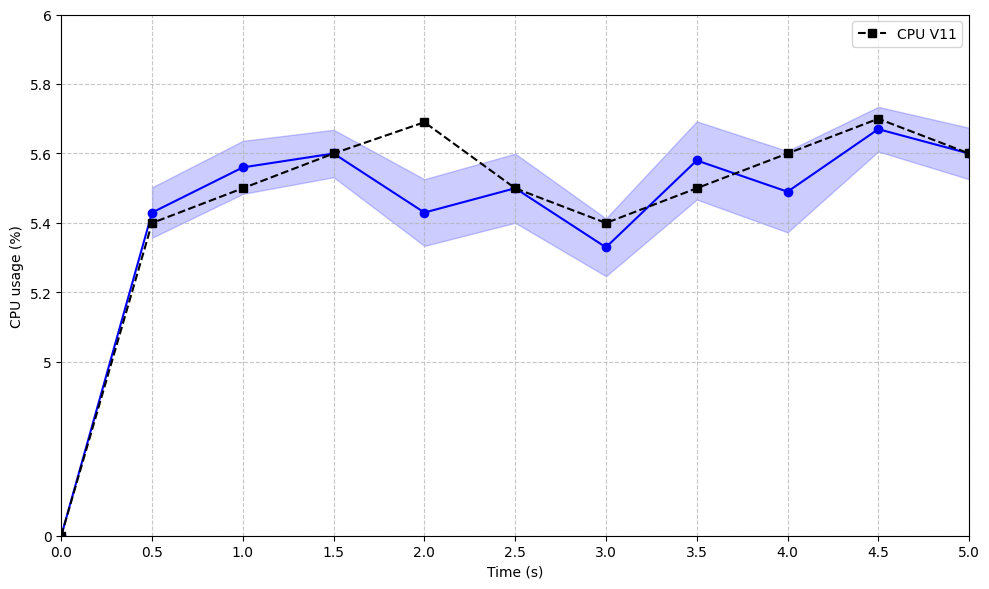

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Dados da média original
tempos = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
medias = [0.0, 5.43, 5.56, 5.60, 5.43, 5.5, 5.33, 5.58, 5.49, 5.67, 5.60]

# Dados da versão CPU V11
cpu_v11 = [0.0, 5.4, 5.5, 5.6, 5.69, 5.50, 5.40, 5.50, 5.60, 5.70, 5.60]

# Função de transformação (0→0, 5→2, 6→6)
def transform_y(y):
    return np.where(y <= 5, y * 0.4, 2 + (y - 5) * 4)

# Valores desejados no eixo Y (incluindo intermediários)
y_values = [0, 5, 5.2, 5.4, 5.6, 5.8, 6]
y_labels = ['0', '5', '5.2', '5.4', '5.6', '5.8', '6']

# Aplicar transformação
y_transformed = [transform_y(val) for val in medias]
y_transformed_v11 = [transform_y(val) for val in cpu_v11]
yticks_transformed = [transform_y(val) for val in y_values]

# Inicializar listas para limites do desvio padrão (excluindo o ponto 0.0)
limite_superior = []
limite_inferior = []
tempos_validos = []  # Armazenará apenas os tempos com média calculada

# Calcular desvio padrão adaptativo para cada ponto (exceto o primeiro)
for i in range(1, len(medias)):  # Começa em 1 para pular o 0.0
    start = max(1, i - 2)  # Evita incluir o 0.0
    end = min(len(medias), i + 3)
    janela = medias[start:end]
    media = medias[i]
    desvio = np.std(janela, ddof=0)
    limite_superior.append(media + desvio)
    limite_inferior.append(media - desvio)
    tempos_validos.append(tempos[i])

# Transformar os limites do desvio padrão
limite_superior_transformed = [transform_y(val) for val in limite_superior]
limite_inferior_transformed = [transform_y(val) for val in limite_inferior]

# Criar gráfico
plt.figure(figsize=(10, 6))

# Linha média original (transformada)
plt.plot(tempos, y_transformed, color='blue', marker='o')

# Área de desvio padrão (apenas para tempos válidos)
plt.fill_between(
    tempos_validos,
    limite_inferior_transformed,
    limite_superior_transformed,
    color='blue',
    alpha=0.2,
    #label='±1 Standard Deviation'
)

# Linha CPU V11 (transformada)
plt.plot(tempos, y_transformed_v11, label='CPU V11', color='black', linestyle='--', marker='s')

# Configurar eixos
plt.ylim(transform_y(0), transform_y(6))
plt.yticks(ticks=yticks_transformed, labels=y_labels)
plt.xlim(0, 5)
plt.xticks(tempos)

# Configurações finais
#plt.title('Comparison: Original Average vs. V11 CPU (with Standard Deviation)')
plt.xlabel('Time (s)')
plt.ylabel('CPU usage (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
#plt.show()
plt.savefig("fig4.pdf", format="pdf", bbox_inches="tight")

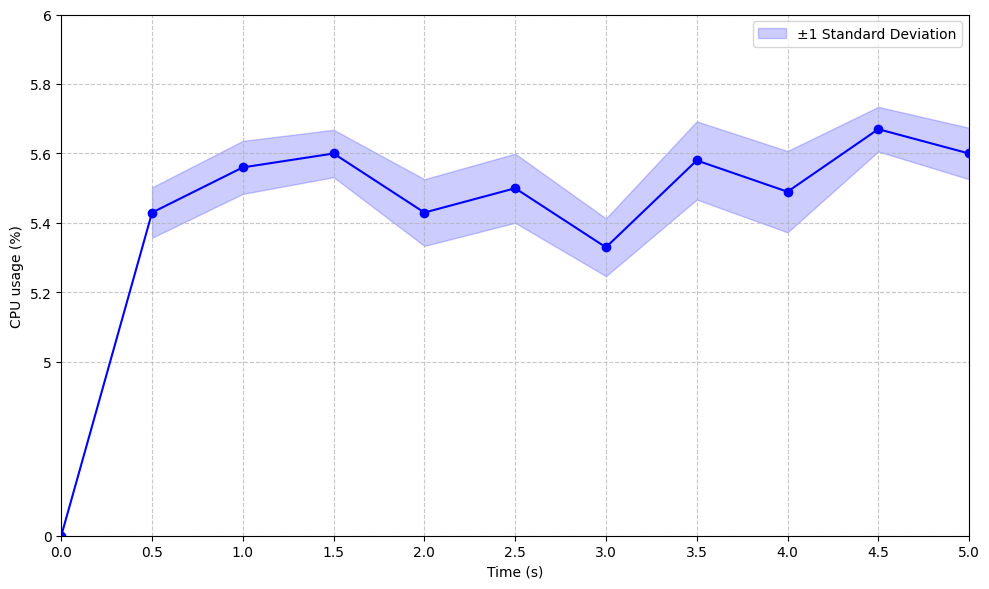

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Dados da média original
tempos = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
medias = [0.0, 5.43, 5.56, 5.60, 5.43, 5.5, 5.33, 5.58, 5.49, 5.67, 5.60]

# Função de transformação (0→0, 5→2, 6→6)
def transform_y(y):
    return np.where(y <= 5, y * 0.4, 2 + (y - 5) * 4)

# Valores desejados no eixo Y (incluindo intermediários)
y_values = [0, 5, 5.2, 5.4, 5.6, 5.8, 6]
y_labels = ['0', '5', '5.2', '5.4', '5.6', '5.8', '6']

# Aplicar transformação
y_transformed = [transform_y(val) for val in medias]
yticks_transformed = [transform_y(val) for val in y_values]

# Inicializar listas para limites do desvio padrão (excluindo o ponto 0.0)
limite_superior = []
limite_inferior = []
tempos_validos = []  # Armazenará apenas os tempos com média calculada

# Calcular desvio padrão adaptativo para cada ponto (exceto o primeiro)
for i in range(1, len(medias)):  # Começa em 1 para pular o 0.0
    start = max(1, i - 2)  # Evita incluir o 0.0
    end = min(len(medias), i + 3)
    janela = medias[start:end]
    media = medias[i]
    desvio = np.std(janela, ddof=0)
    limite_superior.append(media + desvio)
    limite_inferior.append(media - desvio)
    tempos_validos.append(tempos[i])

# Transformar os limites do desvio padrão
limite_superior_transformed = [transform_y(val) for val in limite_superior]
limite_inferior_transformed = [transform_y(val) for val in limite_inferior]

# Criar gráfico
plt.figure(figsize=(10, 6))

# Linha média original (transformada)
plt.plot(tempos, y_transformed, color='blue', marker='o')

# Área de desvio padrão (apenas para tempos válidos)
plt.fill_between(
    tempos_validos,
    limite_inferior_transformed,
    limite_superior_transformed,
    color='blue',
    alpha=0.2,
    label='±1 Standard Deviation'
)

# Configurar eixos
plt.ylim(transform_y(0), transform_y(6))
plt.yticks(ticks=yticks_transformed, labels=y_labels)
plt.xlim(0, 5)
plt.xticks(tempos)

# Configurações finais
#plt.title('Comparison: Original Average vs. V11 CPU (with Standard Deviation)')
plt.xlabel('Time (s)')
plt.ylabel('CPU usage (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
#plt.show()
plt.savefig("fig3.pdf", format="pdf", bbox_inches="tight")

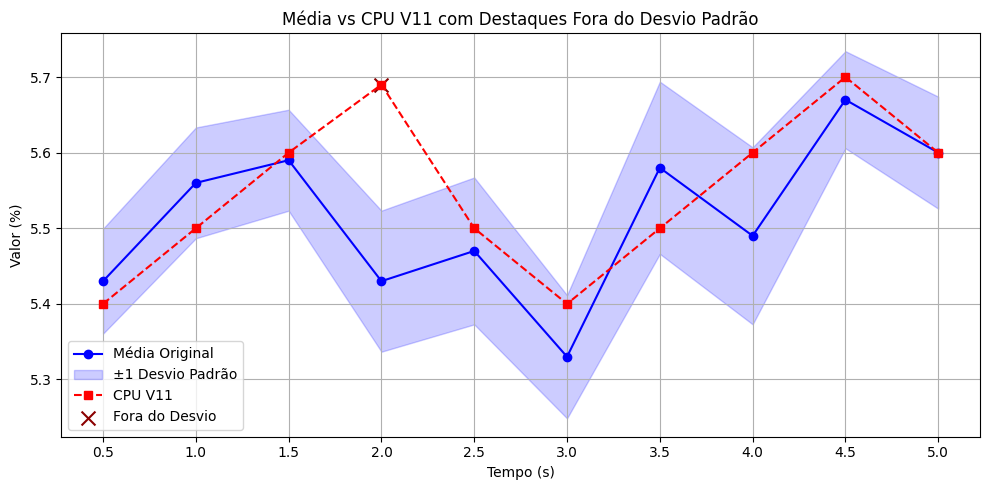

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
tempos = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
medias = [5.43, 5.56, 5.59, 5.43, 5.47, 5.33, 5.58, 5.49, 5.67, 5.60]
cpu_v11 = [5.4, 5.5, 5.6, 5.69, 5.50, 5.40, 5.50, 5.60, 5.70, 5.60]

# Cálculo do desvio padrão adaptativo
limite_superior = []
limite_inferior = []
for i in range(len(medias)):
    start = max(0, i - 2)
    end = min(len(medias), i + 3)
    janela = medias[start:end]
    media = medias[i]
    desvio = np.std(janela, ddof=0)
    limite_superior.append(media + desvio)
    limite_inferior.append(media - desvio)

# Identificar pontos onde V11 ultrapassa os limites
anomalias_x = []
anomalias_y = []
for i in range(len(cpu_v11)):
    if cpu_v11[i] > limite_superior[i] or cpu_v11[i] < limite_inferior[i]:
        anomalias_x.append(tempos[i])
        anomalias_y.append(cpu_v11[i])

# Criar gráfico
plt.figure(figsize=(10, 5))

# Média original
plt.plot(tempos, medias, label='Média Original', color='blue', marker='o')

# Faixa de desvio padrão
plt.fill_between(tempos, limite_inferior, limite_superior, color='blue', alpha=0.2, label='±1 Desvio Padrão')

# Linha CPU V11
plt.plot(tempos, cpu_v11, label='CPU V11', color='red', linestyle='--', marker='s')

# Destacar anomalias
plt.scatter(anomalias_x, anomalias_y, color='darkred', marker='x', s=100, label='Fora do Desvio')

# Ajustes visuais
plt.title('Média vs CPU V11 com Destaques Fora do Desvio Padrão')
plt.xlabel('Tempo (s)')
plt.ylabel('Valor (%)')
plt.xticks(tempos)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Saving ResultadosExperimento (1).xlsx to ResultadosExperimento (1) (21).xlsx


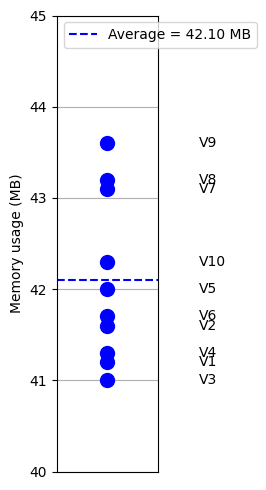

In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

# Carregar os dados
uploaded = files.upload()
df = pd.read_excel(next(iter(uploaded.keys())))

# Seleciona as colunas de Uso de Memória
memoria_cols = df.filter(like='Uso de Memoria').columns

# Extrai os valores (assume uma única linha com os dados)
memorias = df[memoria_cols].iloc[0].values

# Extrair versões (V1, V2, ...)
versoes = memoria_cols.str.extract(r'V(\d+)')[0].astype(int)
versoes.name = 'Version'

# Calcula a média
media_memoria = memorias.mean()

# === Gráfico apenas com eixo Y ===
plt.figure(figsize=(3, 5))  # Gráfico estreito e vertical
plt.ylim(40, 45)

# Plota os valores individuais como pontos verticais
plt.plot([1]*len(memorias), memorias, 'o', color='blue', markersize=10)

# Adiciona os rótulos das versões ao lado dos pontos
for v, m in zip(versoes, memorias):
    plt.text(1.1, m, f'V{v}', va='center')

# Linha da média
plt.axhline(media_memoria, color='blue', linestyle='--', label=f'Average = {media_memoria:.2f} MB')
plt.legend(loc='upper left')

# Ajustes visuais
plt.ylabel('Memory usage (MB)')
plt.xticks([])  # Remove o eixo X
#plt.title('Uso de Memória - V1 a V10')
#plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True, axis='y')
plt.tight_layout()
#plt.show()
plt.savefig("Disc2.pdf", format="pdf", bbox_inches="tight")

Saving ResultadosExperimento (1).xlsx to ResultadosExperimento (1) (2).xlsx


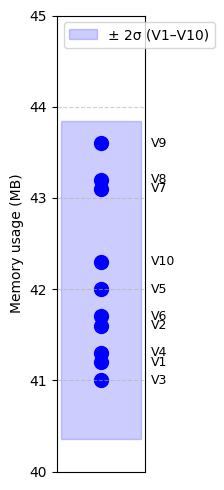

In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados da planilha
uploaded = files.upload()
df = pd.read_excel(next(iter(uploaded.keys())))

# Selecionar colunas de uso de memória
memoria_cols = df.filter(like='Uso de Memoria').columns

# Extrair valores (assume uma única linha com os dados)
memorias = df[memoria_cols].iloc[0].values

# Extrair versões (V1, V2, ...)
versoes = memoria_cols.str.extract(r'V(\d+)')[0].astype(int)

# Calcular média e desvio padrão
media_memoria = np.mean(memorias)
std_memoria = np.std(memorias)

# === Gráfico vertical ===
plt.figure(figsize=(2, 5))
x_pos = 1  # eixo X fixo
plt.ylim(40, 45)

# Área de desvio padrão (±2σ)
plt.fill_betweenx(
    y=[media_memoria - 2 * std_memoria, media_memoria + 2 * std_memoria],
    x1=x_pos - 0.2,
    x2=x_pos + 0.2,
    color='blue',
    alpha=0.2,
    label='± 2σ (V1–V10)'
)

# Pontos individuais
plt.scatter([x_pos]*len(memorias), memorias, color='blue', s=100) #label='Memory usage')

# Rótulos das versões
for v, m in zip(versoes, memorias):
    plt.text(x_pos + 0.25, m, f'V{v}', va='center', fontsize=9)

# Ajustes visuais
plt.gca().xaxis.set_visible(False)
plt.ylabel('Memory usage (MB)')
#plt.title('Memory usage (± 2σ) - V1 a V10')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(loc='upper left')
plt.tight_layout()
#plt.show()
plt.savefig("Disc3.pdf", format="pdf", bbox_inches="tight")

Faça upload do arquivo com V1 a V10:


Saving ResultadosExperimento (1).xlsx to ResultadosExperimento (1) (3).xlsx
Agora faça upload do arquivo com V11:


Saving ResultadosExperimentoV11.xlsx to ResultadosExperimentoV11 (1).xlsx


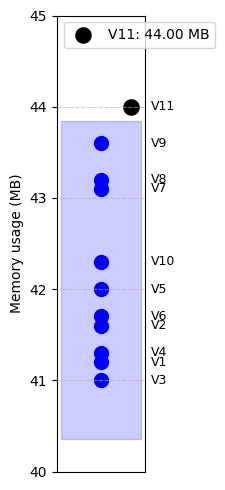

In [ ]:
import pandas as pd
from google.colab import files
import io
import matplotlib.pyplot as plt
import numpy as np

# === Upload dos arquivos ===
print("Faça upload do arquivo com V1 a V10:")
uploaded = files.upload()
df_base = pd.read_excel(io.BytesIO(uploaded[next(iter(uploaded))]))

print("Agora faça upload do arquivo com V11:")
uploaded = files.upload()
df_v11 = pd.read_excel(io.BytesIO(uploaded[next(iter(uploaded))]))

# === Processar dados base (V1–V10) ===
mem_cols_base = df_base.filter(like='Uso de Memoria').columns
mem_values_base = df_base[mem_cols_base].iloc[0].values
versoes_base = mem_cols_base.str.extract(r'V(\d+)')[0].astype(int)

# Calcular média e desvio padrão
media_base = np.mean(mem_values_base)
std_base = np.std(mem_values_base)

# === Processar V11 ===
mem_col_v11 = df_v11.filter(like='Uso de Memoria').columns
uso_memoria_v11 = df_v11[mem_col_v11[0]].iloc[0]
versao_v11 = 11

# === Plotagem ===
plt.figure(figsize=(2, 5))
x_pos = 1
plt.ylim(40, 45)

# Área do desvio padrão (±2σ)
plt.fill_betweenx(
    y=[media_base - 2 * std_base, media_base + 2 * std_base],
    x1=x_pos - 0.2,
    x2=x_pos + 0.2,
    color='blue',
    alpha=0.2,
    #label='± 2σ (V1–V10)'
)

# Pontos V1–V10
plt.scatter([x_pos] * len(mem_values_base), mem_values_base, color='blue', s=100) #label='V1–V10')

# Pontos V11
plt.scatter(
    [x_pos + 0.15], [uso_memoria_v11],
    color='black', edgecolor='black', s=120,
    label=f'V11: {uso_memoria_v11:.2f} MB'
)
plt.text(x_pos + 0.25, uso_memoria_v11, f'V11', va='center', fontsize=9, color='black')

# Rótulos V1–V10
for v, m in zip(versoes_base, mem_values_base):
    plt.text(x_pos + 0.25, m, f'V{v}', va='center', fontsize=9)

# Ajustes visuais
plt.gca().xaxis.set_visible(False)
plt.ylabel('Memory usage (MB)')
#plt.title('Uso de Memória (± 2σ) - V1 a V10 vs V11')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(loc='upper left')
plt.tight_layout()
#plt.show()
plt.savefig("Disc4.pdf", format="pdf", bbox_inches="tight")


Saving ResultadosExperimento (1).xlsx to ResultadosExperimento (1) (20).xlsx


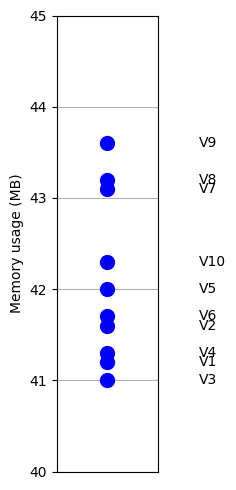

In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

# Carregar os dados
uploaded = files.upload()
df = pd.read_excel(next(iter(uploaded.keys())))

# Seleciona as colunas de Uso de Memória
memoria_cols = df.filter(like='Uso de Memoria').columns

# Extrai os valores (assume uma única linha com os dados)
memorias = df[memoria_cols].iloc[0].values

# Extrair versões (V1, V2, ...)
versoes = memoria_cols.str.extract(r'V(\d+)')[0].astype(int)
versoes.name = 'Version'

# === Gráfico apenas com eixo Y ===
plt.figure(figsize=(3, 5))  # Gráfico estreito e vertical
plt.ylim(40, 45)

# Plota os valores individuais como pontos verticais
plt.plot([1]*len(memorias), memorias, 'o', color='blue', markersize=10)

# Adiciona os rótulos das versões ao lado dos pontos
for v, m in zip(versoes, memorias):
    plt.text(1.1, m, f'V{v}', va='center')

# Ajustes visuais
plt.ylabel('Memory usage (MB)')
plt.xticks([])  # Remove o eixo X
#plt.title('Uso de Memória - V1 a V10')
#plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True, axis='y')
plt.tight_layout()
#plt.show()
plt.savefig("Disc1.pdf", format="pdf", bbox_inches="tight")